### Bibliotecas

In [1]:
# Instalação manual de bibliotecas
!pip install numpy matplotlib pandas seaborn
# Bibliotecas


# import ml_utils as ml
# %load_ext autoreload
# %autoreload 2
# %run -i ml_utils
# %reload_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math


### Funções utilitárias

In [2]:
def print_format(string, value):
    print(f"{string} =\n{value}")

# 5) Para a base regressao1.csv, sabendo que x é a entrada e t é a saída, obtenha um modelo linear de regressão usando as primeiras 100 amostras para treino e o resto para teste. Obtenha novamente um modelo de regressão linear, mas usando agora RANSAC para eliminar os outliers dos dados de treino. Calcule os valores de RMSE e MAPE de ambos os modelos sobre os dados de teste e compare os resultados.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [4]:
## Leitura inicial
# features = []
data_raw = pd.read_csv('data/regressao1.csv', sep=';')
print(data_raw.shape)

data_raw.head()


(201, 2)


,t,x
0,3.1006,0.0
1,5.0442,0.5
2,5.0859,1.0
3,125.7102,1.5
4,7.2577,2.0


In [5]:
data_raw.describe()

,t,x
count,201.000000,201.00000
mean,148.458627,50.00000
std,91.175334,29.08393
min,-145.683000,0.00000
25%,71.211900,25.00000
50%,149.379900,50.00000
75%,224.624300,75.00000
max,309.117200,100.00000


### Obtendo modelo de regressão linear

Estimativas dos parâmetros:

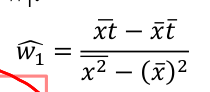
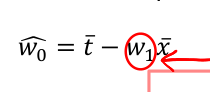

In [7]:
# Função que calcula regressão linear simples (uma entrada e uma saída)
# entrada: 
#   dataset -> linhas são amostras, colunas são features (Coluna 't' de saídas e coluna 'x' de entradas)
# saída:
#   [w0, w1]
def linear_regression(data_train):
    w1 = (((data_train['x']*data_train['t']).sum()/data_train.shape[0]) - (data_train['x'].mean() * data_train['t'].mean()))/(((data_train['x']*data_train['x']).sum()/data_train.shape[0]) - math.pow((data_train['x'].mean()),2))
    w0 = data_train['t'].mean() - w1*data_train['x'].mean()
    return w0, w1

Determinando modelo ingênuo

In [8]:
train_slice = np.arange(0, 100)
data_train = data_raw.iloc[train_slice]
train_slice = np.arange(101, data_raw.shape[0])
data_train = data_raw.iloc[train_slice]

# # Teste de sanidade
# data_train = pd.DataFrame(
#     {
#         't': [4.8, 11.3, 17.2],
#         'x': [1, 3, 5]
#     }
# )
# # estima parâmetros iniciais do modelo
# print((data_train['x']*data_train['t']).sum()/data_train.shape[0])
# print(data_train['x'].mean() * data_train['t'].mean())
# print((data_train['x']*data_train['x']).sum()/data_train.shape[0])
# print(math.pow((data_train['x'].mean()),2))

w0, w1 = linear_regression(data_train)
print_format("w0", w0)
print_format("w1", w1)

w0 =
23.67702542934549
w1 =
2.6250523132312895


Determinando modelo com RANSAC

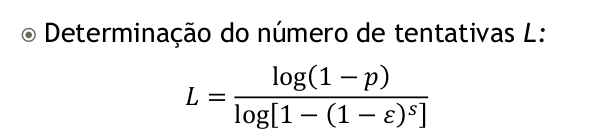
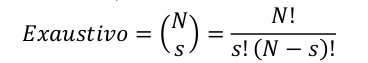
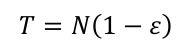
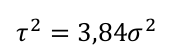



In [39]:
# número total de amostras no conjunto de treino
n_amostras = data_train.shape[0]

# Probabilidade de que ao menos um subconjunto de amostras inclua *zero* outliers
#   valor comum = 0,99
prob_0_outliers = 0.99

# Probabilidade de selecionar um outlier
#   valor conservativo = 0,2
prob_outlier = 0.2

# número de amostras do subconjunto para RANSAC
n_amostras_subconjunto = n_amostras*0.98 # arbitrário
n_amostras_subconjunto = math.ceil(n_amostras_subconjunto) # arredonda para número inteiro

# Calcula número máximo de tentativas 
n_max_tentativas = math.ceil(math.log(1 - prob_0_outliers)/math.log(1 - (1 - prob_outlier)**(n_amostras_subconjunto) ))

# Verifica se valor de 'n_amostras_subconjunto' está distante da busca exaustiva
n_busca_exaustiva = math.ceil((math.factorial(n_amostras)) / (math.factorial(n_amostras_subconjunto) * math.factorial(n_amostras - n_amostras_subconjunto)))
print_format("Número máximo de tentativas", n_max_tentativas)
print_format("Número da busca exaustiva", n_busca_exaustiva)
if(n_max_tentativas >= n_busca_exaustiva):
    print(f"-- *Aviso*: Número de tentativas ({n_max_tentativas}) acima da busca exaustiva ({n_busca_exaustiva})!")
    print(f"-- *Aviso*: Reduzindo número para busca exaustiva ")
    n_max_tentativas = n_busca_exaustiva

else:
    print(f"Subconjunto de {n_amostras_subconjunto} resulta em {100*n_max_tentativas/n_busca_exaustiva}% da busca exaustiva")

# n_outliers_esperado = 

# Número de inliers encontrados na interação
n_inliers = 0

# Seleciona subconjunto dos dados de treino

# Aplica o RANSAC
for i in range(0, n_max_tentativas):
    w0, w1 = linear_regression(data_train)
    print_format("w0", w0)
    print_format("w1", w1)

Número máximo de tentativas =
14468616315
Número da busca exaustiva =
4950
-- *Aviso*: Número de tentativas (14468616315) acima da busca exaustiva (4950)!
-- *Aviso*: Reduzindo número para busca exaustiva 
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.6250523132312895
w0 =
23.67702542934549
w1 =
2.625052313231